In [1]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

In [2]:
pima = pd.read_csv('Data/diabetes.csv', sep=';')
df = pd.read_csv('Data/diabetes_pt1.csv', sep=';')
df_test = pd.read_csv('Data/diabetes_pt2.csv', sep=';')

/tmp/ipykernel_56170/332813748.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Outcome', data=pima, palette="Set2")


Text(0, 0.5, 'Number of People')

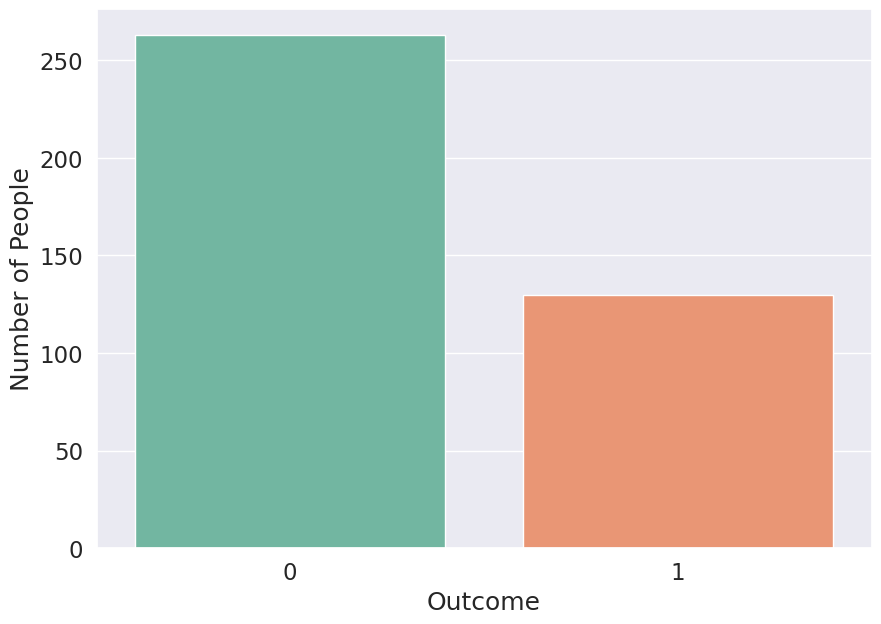

In [3]:
plt.figure(figsize=(10,7))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Outcome', data=pima, palette="Set2")
plt.ylabel('Number of People')

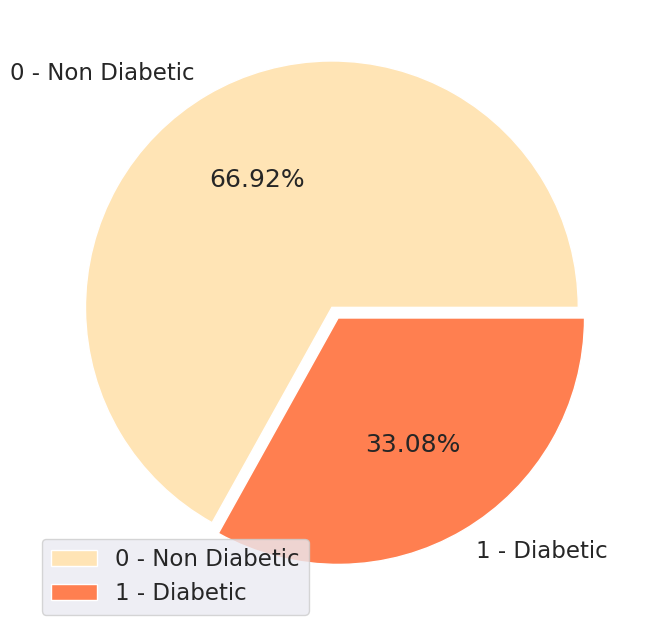

In [4]:
plt.figure(figsize=(8,8))
pieC = pima['Outcome'].value_counts()
explode = (0.05, 0)
colors = ['moccasin', 'coral']
labels = ['0 - Non Diabetic', '1 - Diabetic']
sns.set(font_scale = 1.5)
plt.pie(pieC, labels = ('0 - Non Diabetic', '1 - Diabetic'), autopct = "%.2f%%", explode = explode, colors = colors)
plt.legend(labels, loc = 'lower left')

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

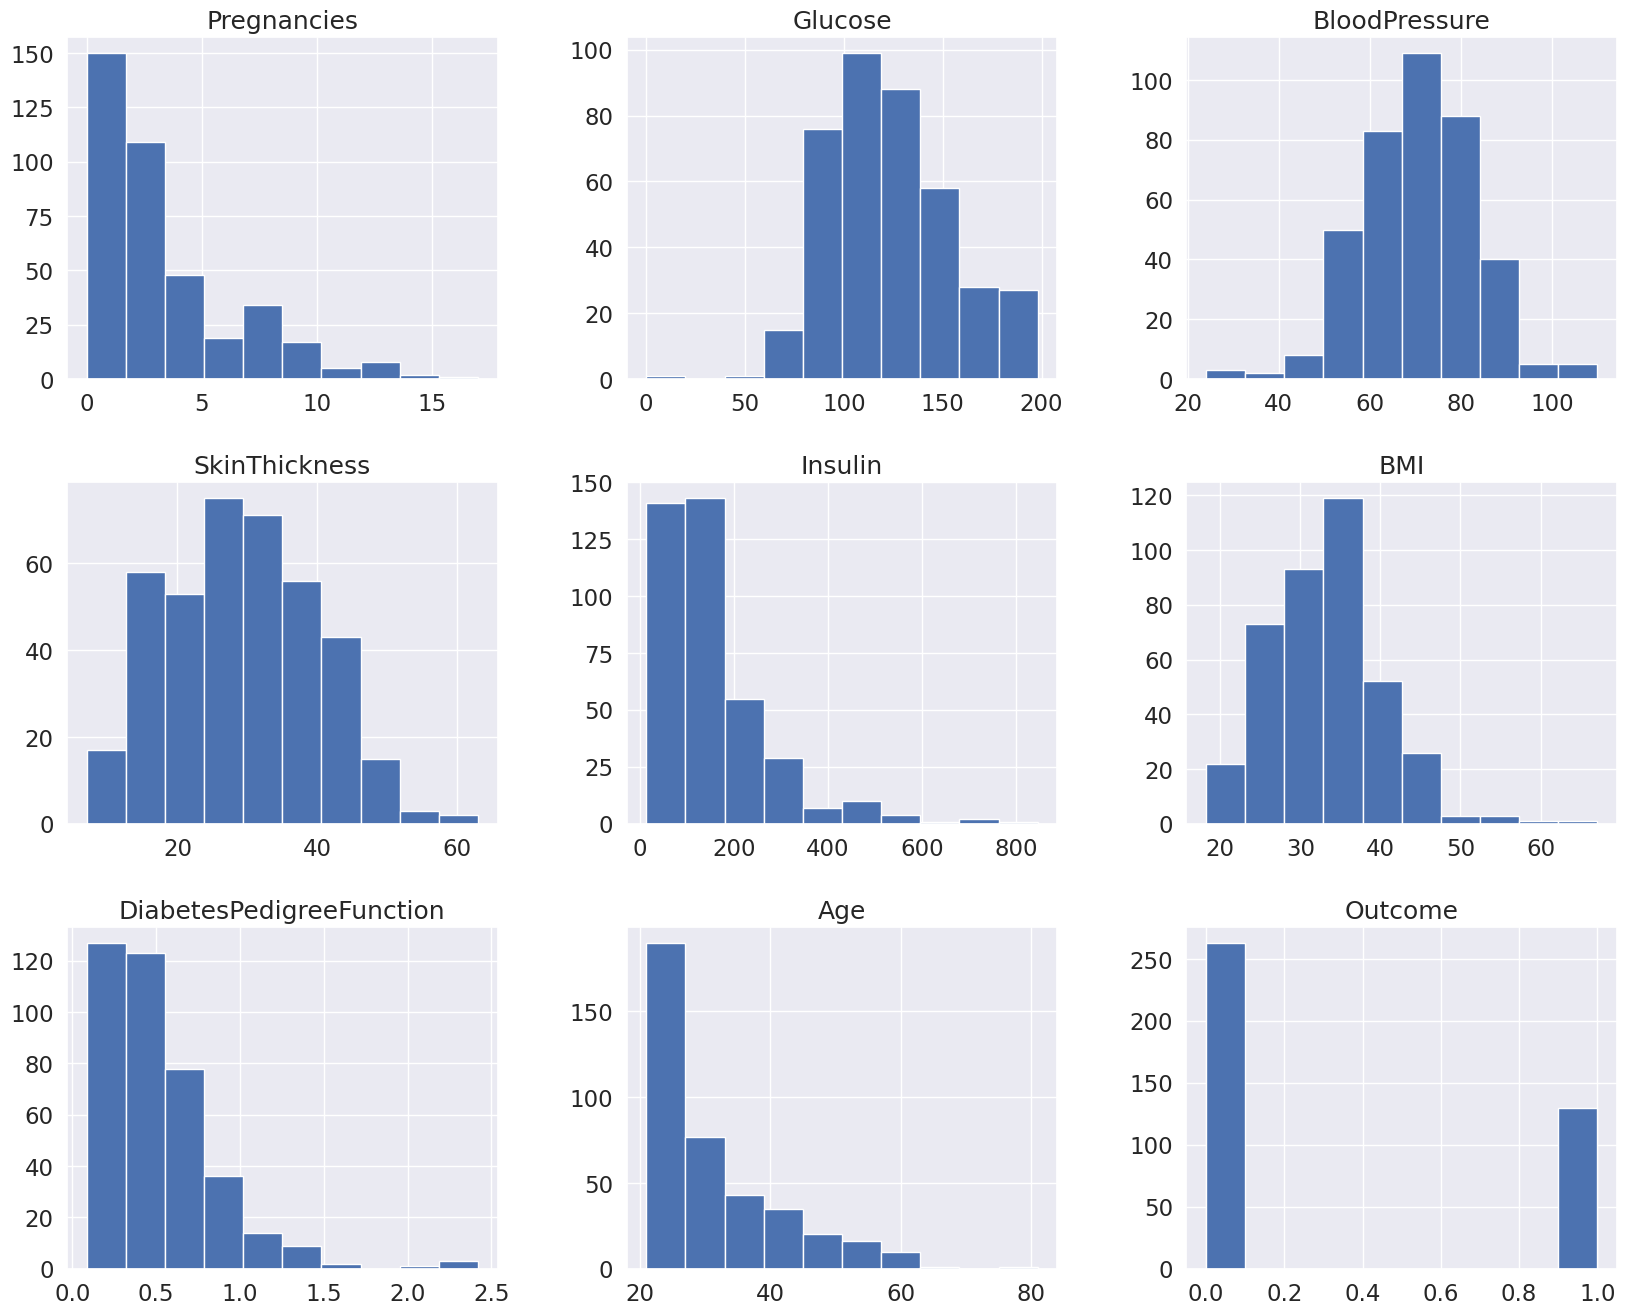

In [5]:
pima.hist(figsize = (20,16),grid=True)

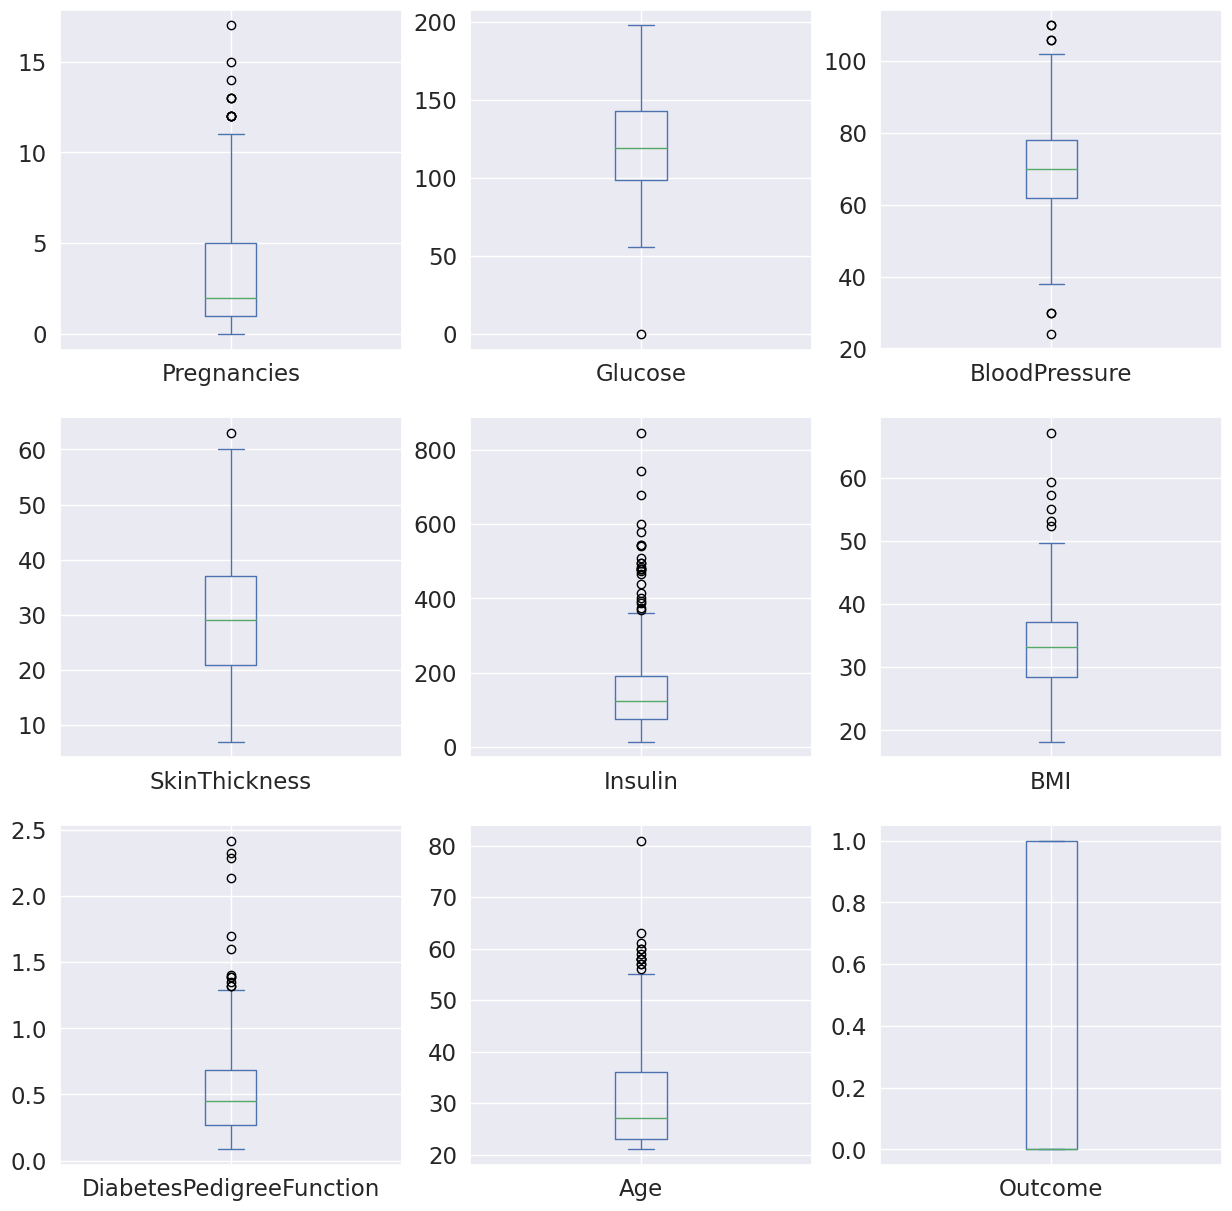

In [6]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
sns.set(font_scale = 1.5)

/tmp/ipykernel_56170/2277464663.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pima.Glucose, ax = ax[0,0], color = 'orange')
/tmp/ipykernel_56170/2277464663.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pima.Pregnancies, ax = ax[0,1], color = 'red')
/tmp/ipykernel_56170/2277464663.py:

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

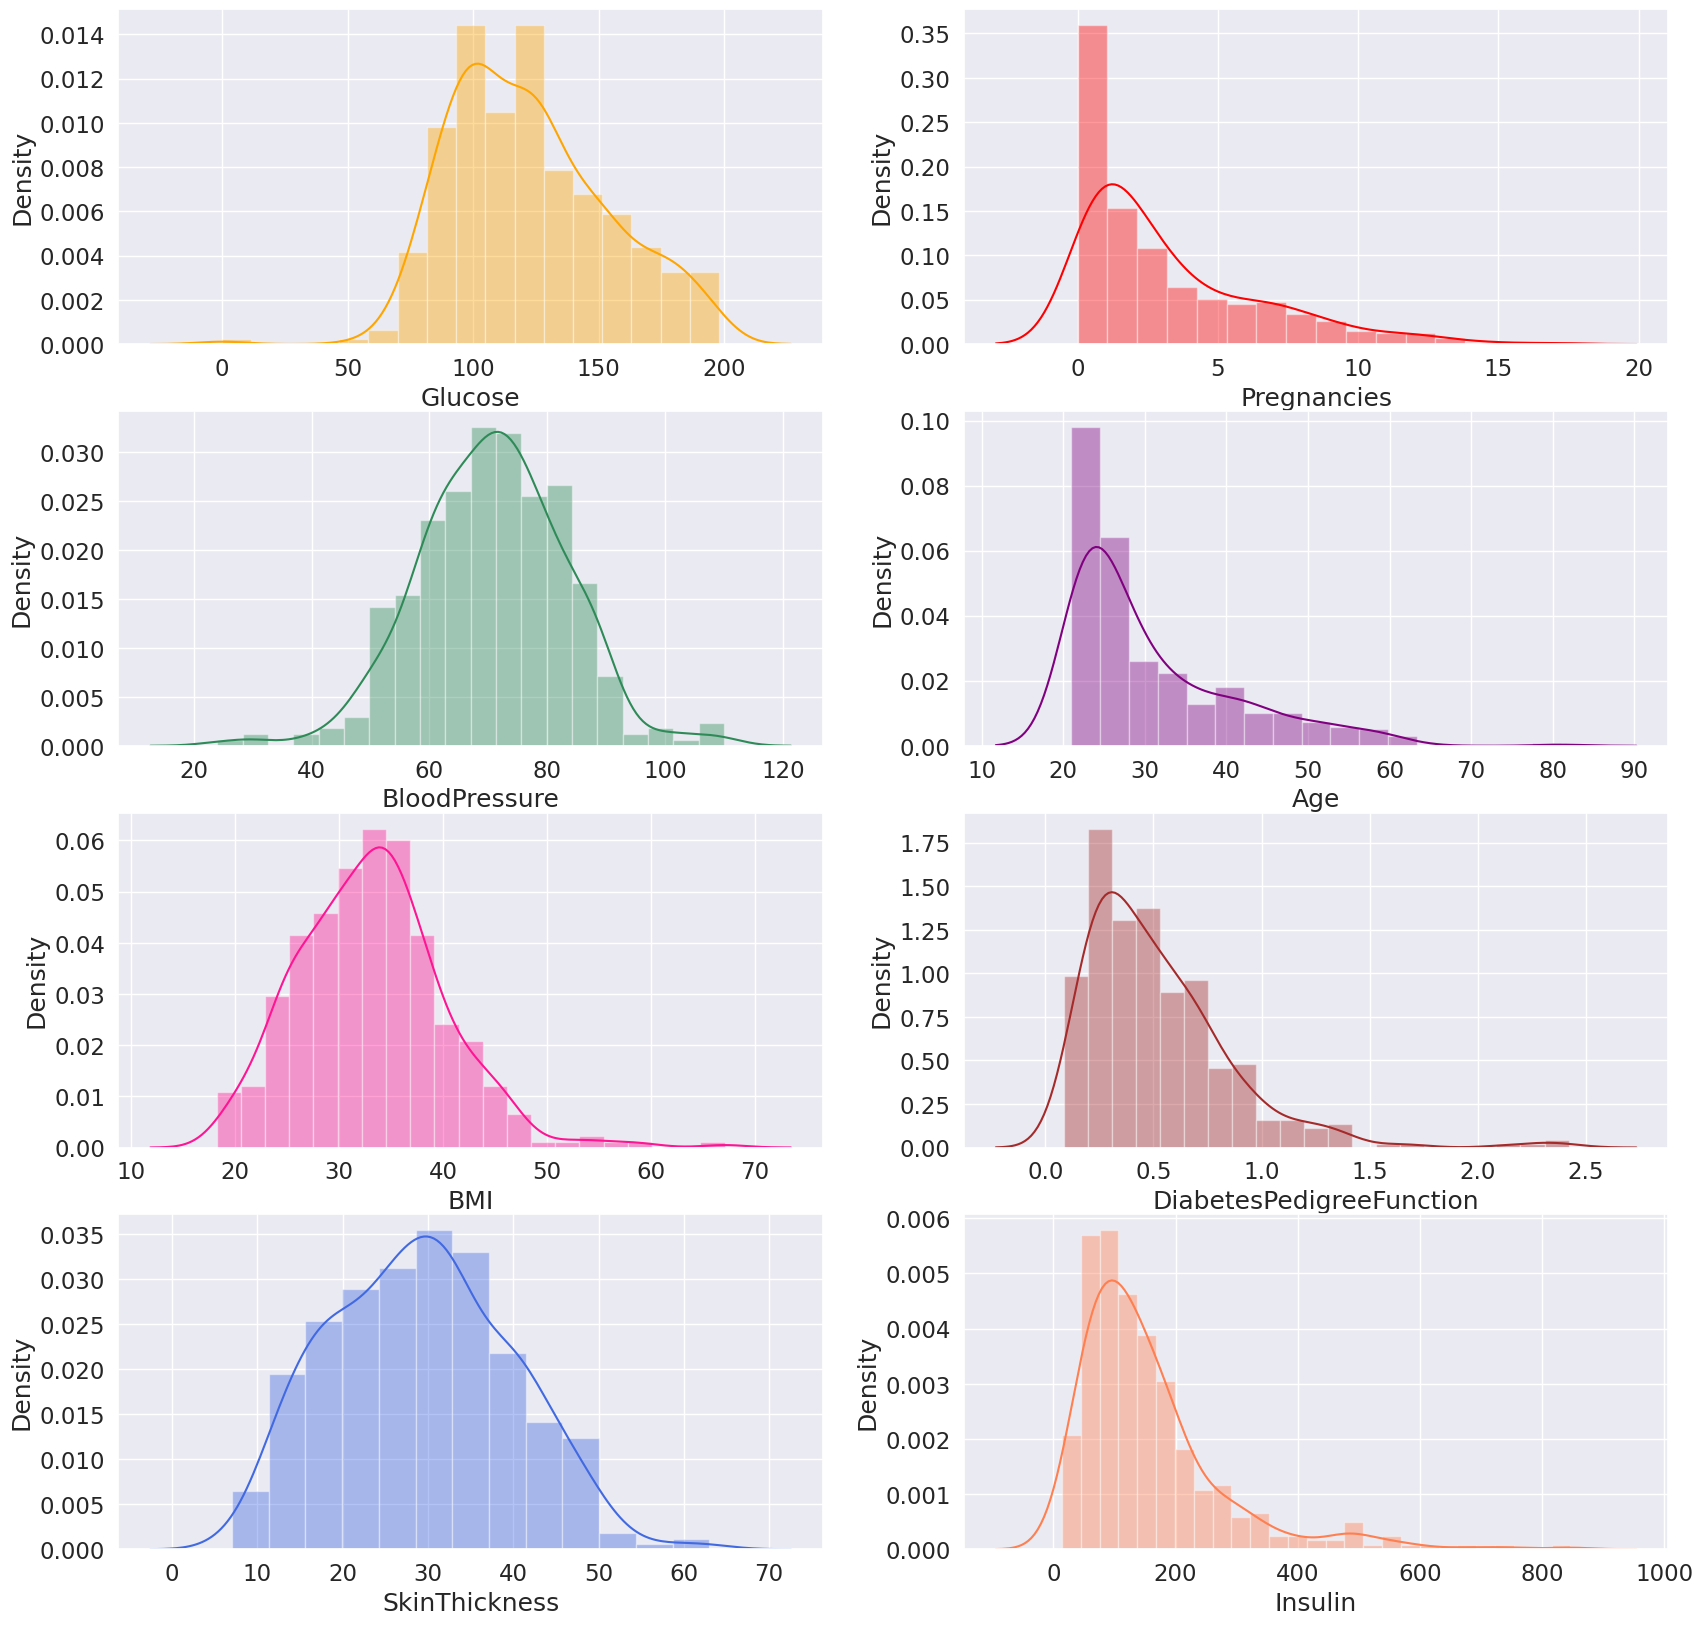

In [7]:
fig, ax = plt.subplots(4,2, figsize=(20,20))
sns.set(font_scale = 1)
sns.distplot(pima.Glucose, ax = ax[0,0], color = 'orange')
sns.distplot(pima.Pregnancies, ax = ax[0,1], color = 'red')
sns.distplot(pima.BloodPressure, ax = ax[1,0], color = 'seagreen')
sns.distplot(pima.Age, ax = ax[1,1], color = 'purple')
sns.distplot(pima.BMI, ax = ax[2,0], color = 'deeppink')
sns.distplot(pima.DiabetesPedigreeFunction, ax = ax[2,1], color = 'brown')
sns.distplot(pima.SkinThickness, ax = ax[3,0], color = 'royalblue')
sns.distplot(pima.Insulin, ax = ax[3,1], color = 'coral')

<AxesSubplot:>

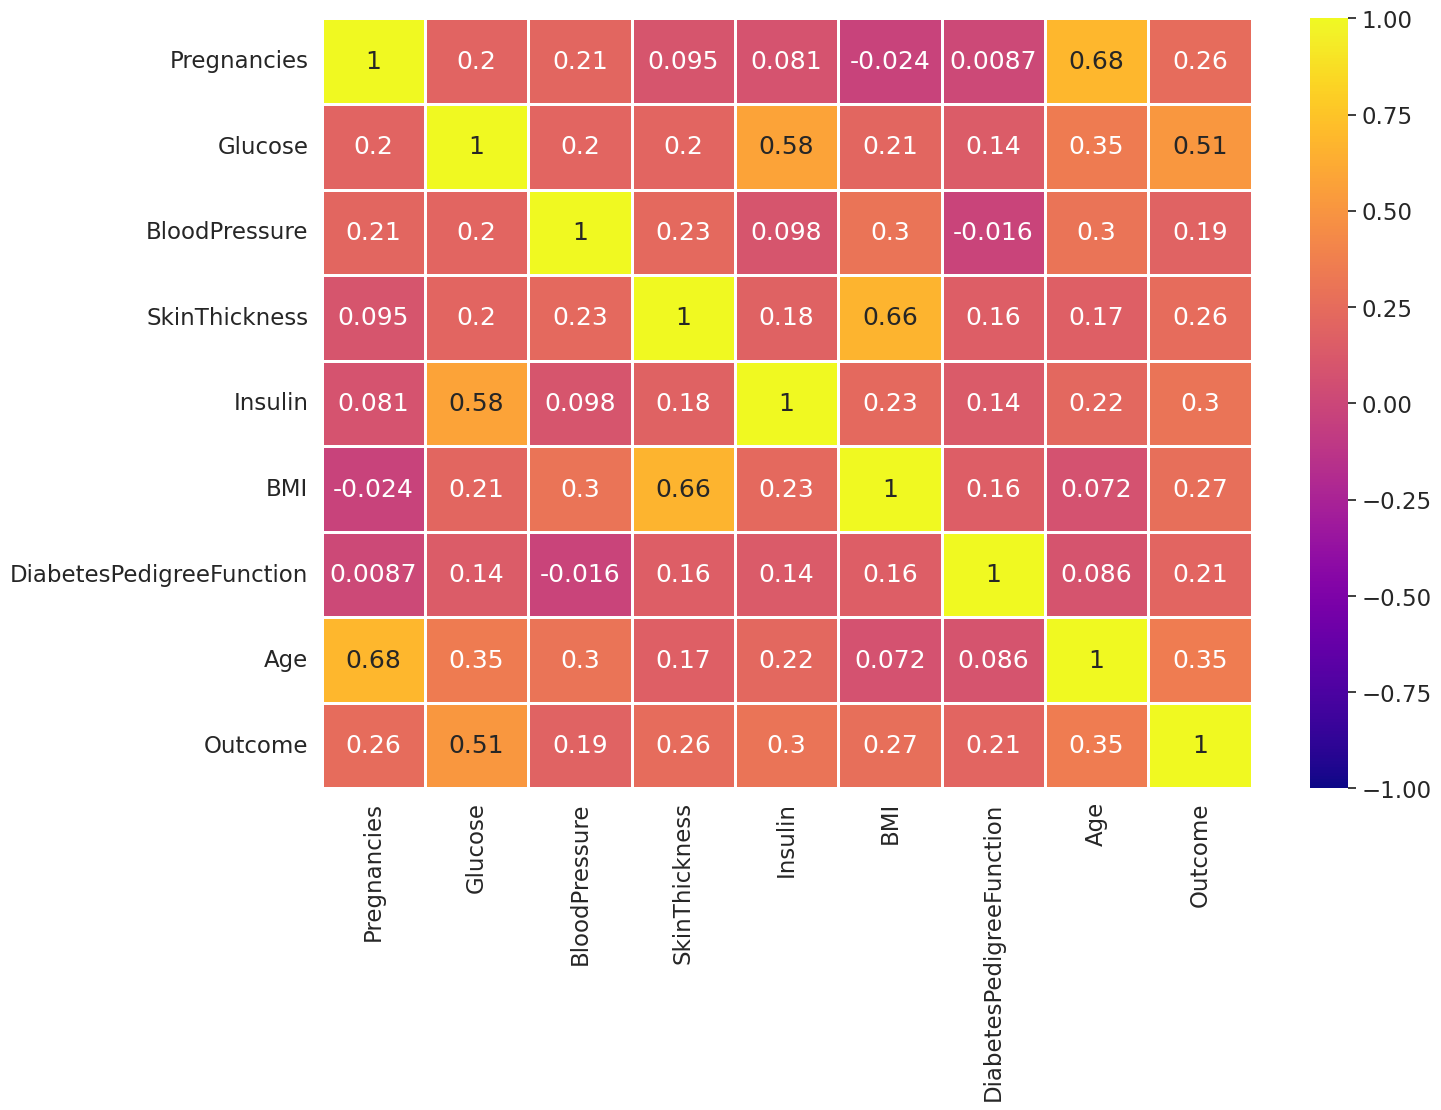

In [8]:
corr = pima.corr()
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.heatmap(corr, annot = True, cmap = 'plasma', vmin = -1, vmax = 1, linecolor='white', linewidths= 1)

Generating data

In [9]:
with open('Stan/population_0.stan', 'r') as f: 

   print(f.read())

model_ppc=CmdStanModel(stan_file='Stan/population_0.stan')

R = 1000
sim_data = model_ppc.sample(data={'N': 393},
                        iter_sampling=393, 
                        iter_warmup=1,
                        refresh=R,
                        fixed_param=True,
                        chains=1)

whot = sim_data.draws_pd()
print(whot[['glucose', 'age', 'bmi']].head())

INFO:cmdstanpy:compiling stan file /DA/Data-Analytics/Project/PimaDiabetesPrediction/LogisticRegresion/Stan/population_0.stan to exe file /DA/Data-Analytics/Project/PimaDiabetesPrediction/LogisticRegresion/Stan/population_0


data {
  int<lower=0> N;
}

generated quantities {
  real glucose = normal_rng(120, 31);
  real age_base = 21; 
  real lambda_age = 0.1;
  real age = age_base + exponential_rng(lambda_age);
  real bmi = normal_rng(33, 7);
  real blood_pressure = normal_rng(70, 12);
  real pregnancies = exponential_rng(0.283);
  real<lower=10> insulin = normal_rng(115, 70);
  real<lower=0.085> dpf = normal_rng(0.35, 0.35);
}


INFO:cmdstanpy:compiled model executable: /DA/Data-Analytics/Project/PimaDiabetesPrediction/LogisticRegresion/Stan/population_0
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



    glucose      age      bmi
0   72.2485  25.2881  30.6962
1       NaN      NaN      NaN
2  100.9200  21.5125  38.9173
3  110.2360  47.9024  45.7203
4  147.2050  28.9554  43.4479


In [10]:
print(pima)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              1       89             66             23       94  28.1   
1              0      137             40             35      168  43.1   
2              3       78             50             32       88  31.0   
3              2      197             70             45      543  30.5   
4              1      189             60             23      846  30.1   
..           ...      ...            ...            ...      ...   ...   
388            0      181             88             44      510  43.3   
389            1      128             88             39      110  36.5   
390            2       88             58             26       16  28.4   
391           10      101             76             48      180  32.9   
392            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.167   21        0  
1                  

In [11]:
print("Average glucose of Pima woman: ", pima['Glucose'].mean())
print("Median glucose of Pima woman: ", pima['Glucose'].median())
print("Std of glucose of Pima woman: ", pima['Glucose'].std())

print("Average BMI of Pima woman: ", pima['BMI'].mean())
print("Median BMI of Pima woman: ", pima['BMI'].median())
print("Std of BMI of Pima woman: ", pima['BMI'].std())

print("Average blood pressure of Pima woman: ", pima['BloodPressure'].mean())
print("Median blood pressure of Pima woman: ", pima['BloodPressure'].median())
print("Std of blood pressure of Pima woman: ", pima['BloodPressure'].std())

print("Average number of children had by Pima woman: ", pima['Pregnancies'].mean())

print("Average insulin of Pima woman: ", pima['Insulin'].mean())
print("Median insulin of Pima woman: ", pima['Insulin'].median())
print("Std of insulin of Pima woman: ", pima['Insulin'].std())

print("Average DPF of Pima woman: ", pima['DiabetesPedigreeFunction'].mean())
print("Median DPF of Pima woman: ", pima['DiabetesPedigreeFunction'].median())
print("Std of DPF of Pima woman: ", pima['DiabetesPedigreeFunction'].std())
print("Min DPF of Pima woman: ", pima['DiabetesPedigreeFunction'].min())
print("Max DPF of Pima woman: ", pima['DiabetesPedigreeFunction'].max())

Average glucose of Pima woman:  122.31552162849873
Median glucose of Pima woman:  119.0
Std of glucose of Pima woman:  31.4359924403438
Average BMI of Pima woman:  33.07251908396947
Median BMI of Pima woman:  33.2
Std of BMI of Pima woman:  7.02394650501943
Average blood pressure of Pima woman:  70.67175572519083
Median blood pressure of Pima woman:  70.0
Std of blood pressure of Pima woman:  12.481277457078892
Average number of children had by Pima woman:  3.295165394402036
Average insulin of Pima woman:  155.7175572519084
Median insulin of Pima woman:  125.0
Std of insulin of Pima woman:  118.8796300934715
Average DPF of Pima woman:  0.5224758269720102
Median DPF of Pima woman:  0.447
Std of DPF of Pima woman:  0.34523212399729586
Min DPF of Pima woman:  0.085
Max DPF of Pima woman:  2.42


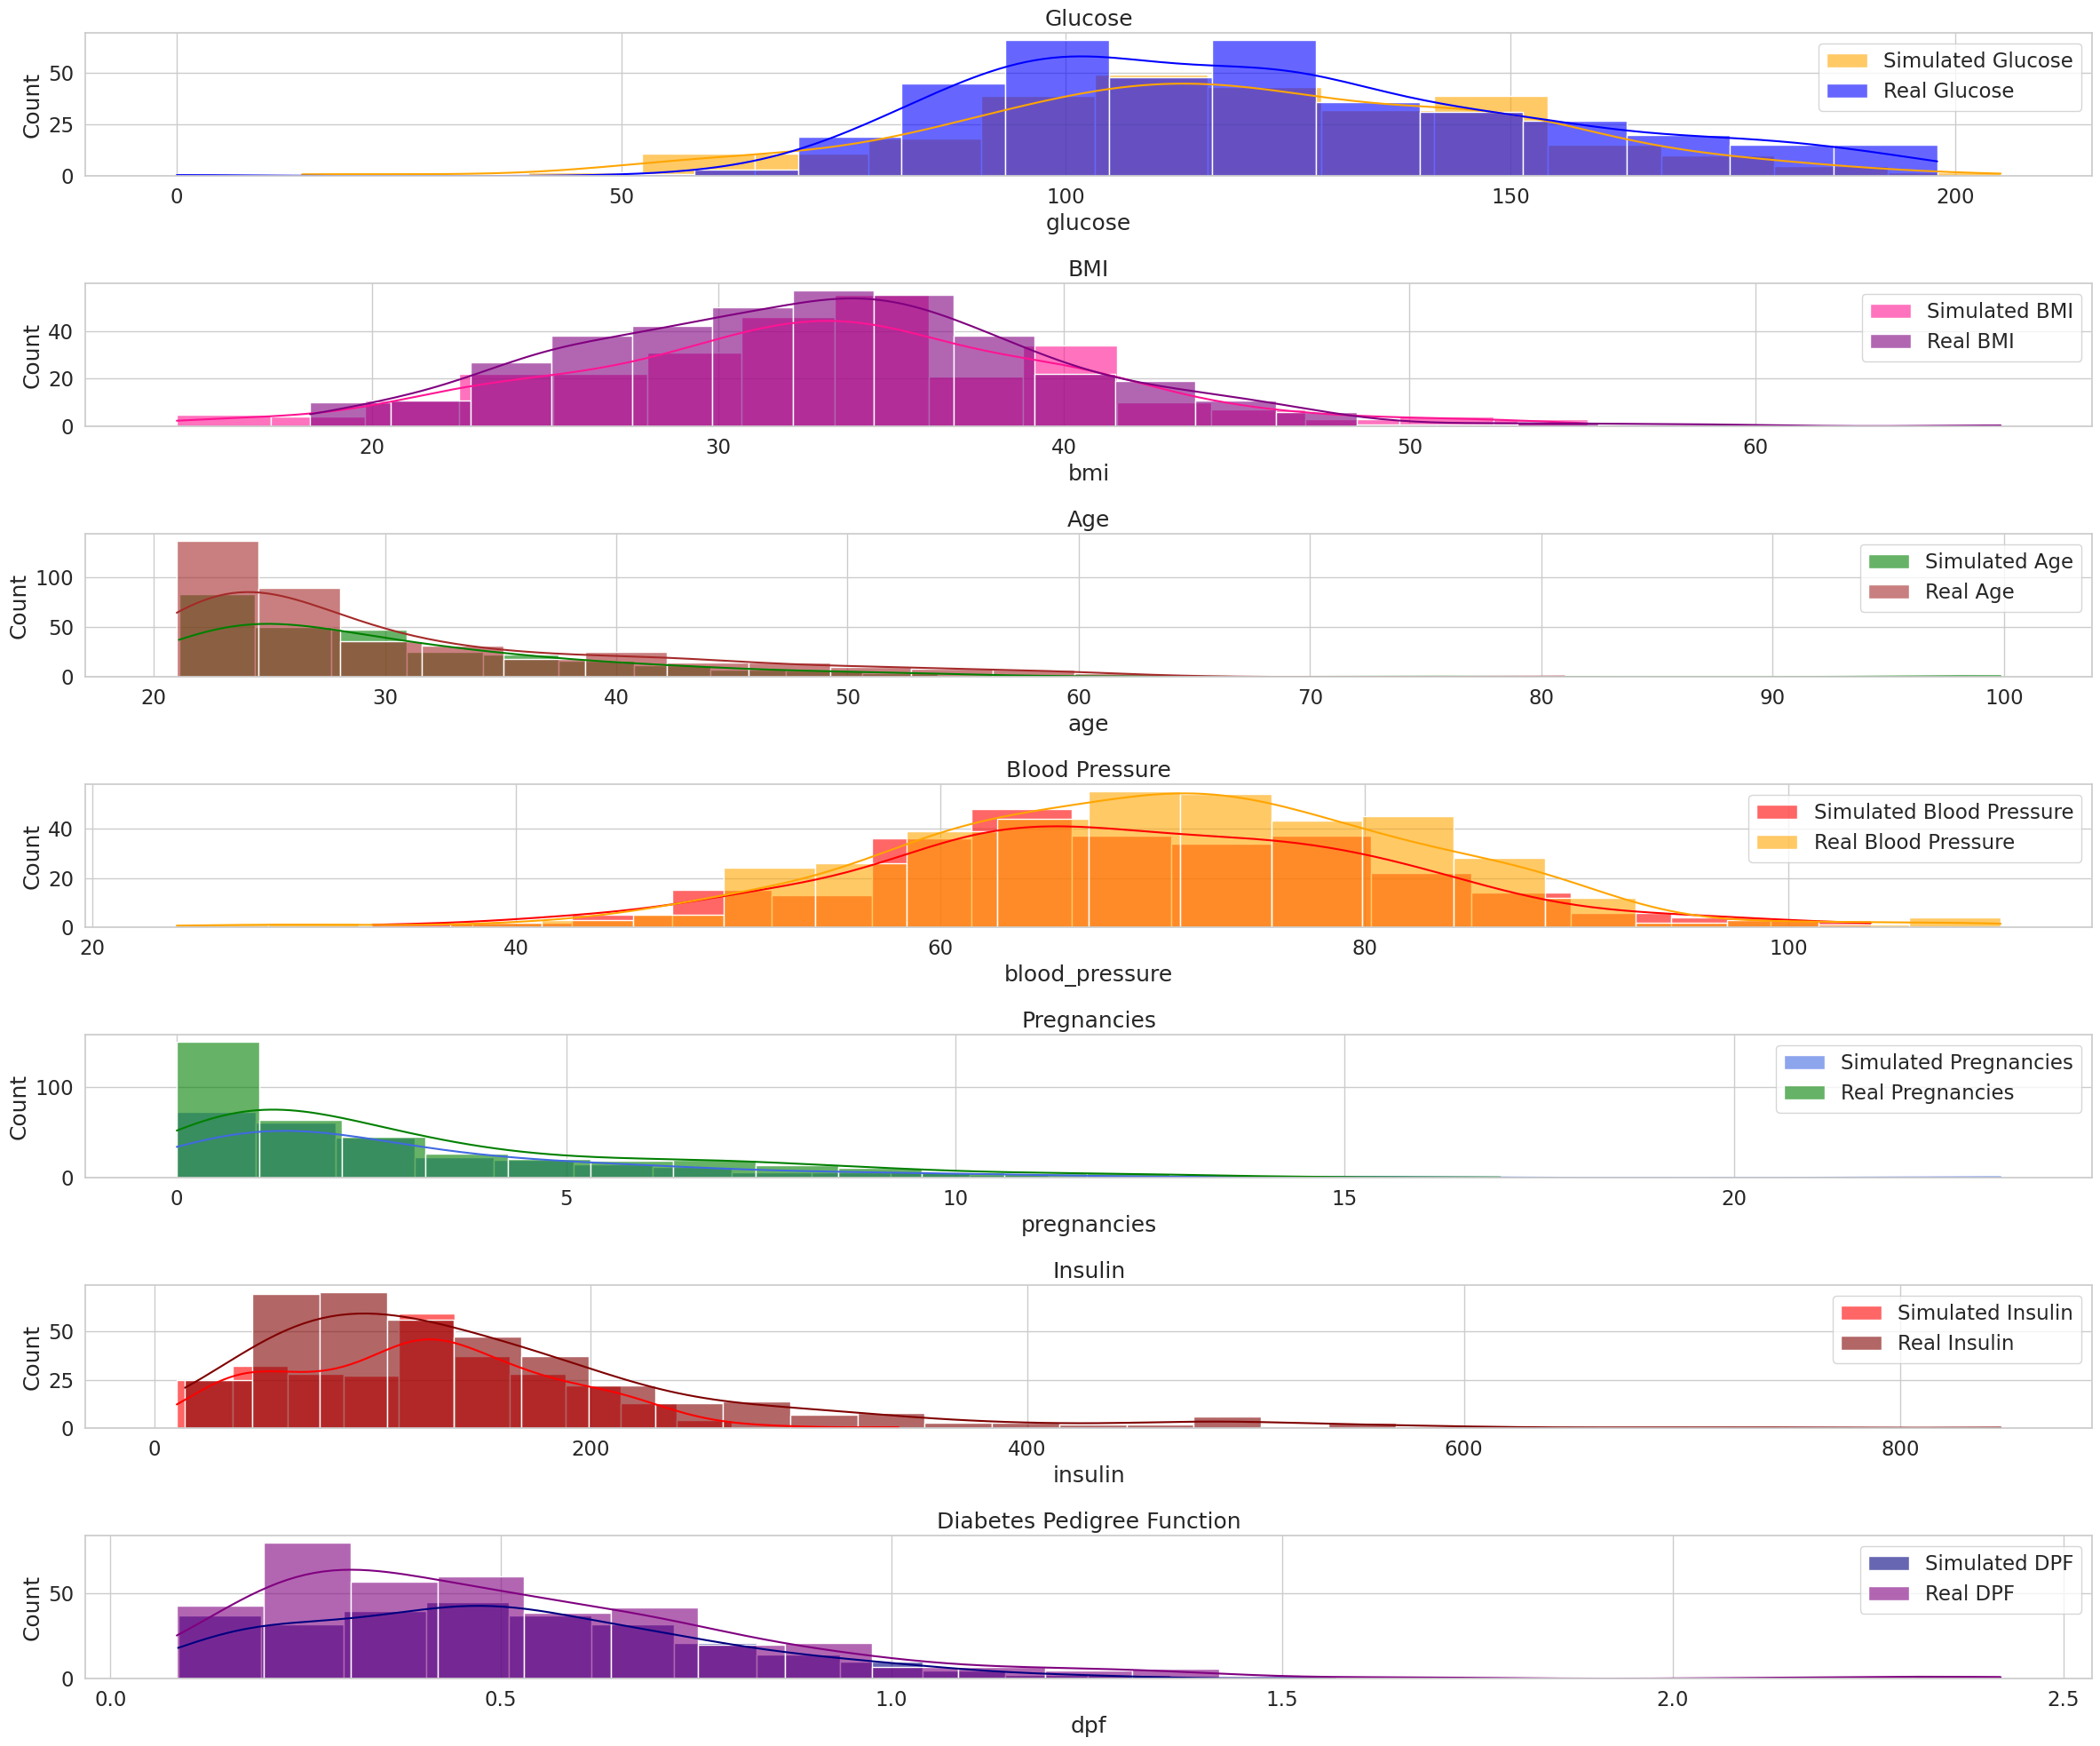

In [12]:
sns.set(style='whitegrid', font_scale=1.5)

fig, axs = plt.subplots(7, 1, figsize=(24, 20))

sns.histplot(data=whot, x='glucose', kde=True, color='orange', ax=axs[0], label='Simulated Glucose', alpha=0.6)
sns.histplot(data=pima, x='Glucose', kde=True, color='blue', ax=axs[0], label='Real Glucose', alpha=0.6)
axs[0].set_title('Glucose')
axs[0].legend()

sns.histplot(data=whot, x='bmi', kde=True, color='deeppink', ax=axs[1], label='Simulated BMI', alpha=0.6)
sns.histplot(data=pima, x='BMI', kde=True, color='purple', ax=axs[1], label='Real BMI', alpha=0.6)
axs[1].set_title('BMI')
axs[1].legend()

sns.histplot(data=whot, x='age', kde=True, color='green', ax=axs[2], label='Simulated Age', alpha=0.6)
sns.histplot(data=pima, x='Age', kde=True, color='brown', ax=axs[2], label='Real Age', alpha=0.6)
axs[2].set_title('Age')
axs[2].legend()

sns.histplot(data=whot, x='blood_pressure', kde=True, color='red', ax=axs[3], label='Simulated Blood Pressure', alpha=0.6)
sns.histplot(data=pima, x='BloodPressure', kde=True, color='orange', ax=axs[3], label='Real Blood Pressure', alpha=0.6)
axs[3].set_title('Blood Pressure')
axs[3].legend()

sns.histplot(data=whot, x='pregnancies', kde=True, color='royalblue', ax=axs[4], label='Simulated Pregnancies', alpha=0.6)
sns.histplot(data=pima, x='Pregnancies', kde=True, color='green', ax=axs[4], label='Real Pregnancies', alpha=0.6)
axs[4].set_title('Pregnancies')
axs[4].legend()

sns.histplot(data=whot, x='insulin', kde=True, color='red', ax=axs[5], label='Simulated Insulin', alpha=0.6)
sns.histplot(data=pima, x='Insulin', kde=True, color='maroon', ax=axs[5], label='Real Insulin', alpha=0.6)
axs[5].set_title('Insulin')
axs[5].legend()

sns.histplot(data=whot, x='dpf', kde=True, color='navy', ax=axs[6], label='Simulated DPF', alpha=0.6)
sns.histplot(data=pima, x='DiabetesPedigreeFunction', kde=True, color='purple', ax=axs[6], label='Real DPF', alpha=0.6)
axs[6].set_title('Diabetes Pedigree Function')
axs[6].legend()

plt.tight_layout()
plt.show()